In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 15})

# Define the time vector and the input signal

In [2]:
fs = 44100  # Sampling frequency                    
dt = 1/fs  # Sampling period       
L = 1      # Length of signal (in seconds)
L=L*fs
t = np.arange(0,L)*dt-0.5   # Time vector, with zero properly placed at N/2+1 position.
NoteFreq = 261.63   # frequency of Do, the first note of the C major scale
NoteDuration=0.5   # in seconds
Note=(np.abs(t)<=(NoteDuration/2))*np.cos(2*np.pi*NoteFreq*t) # We made the signal real and even, which dictates that its frequency will be real. If it was odd, it would be imaginary.

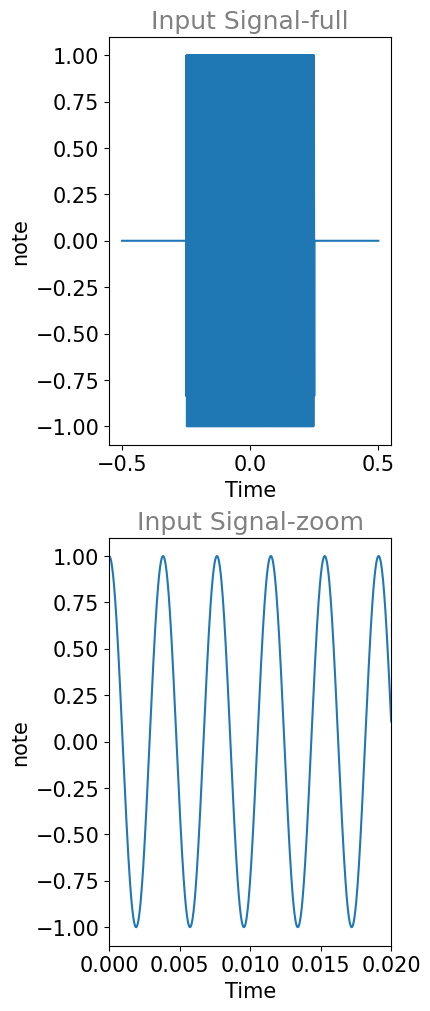

In [3]:
fig1, ax = plt.subplots(2,3, constrained_layout=True)
ax[0, 0].plot(t,Note)
ax[0, 0].set_ylim((-1.1, 1.1))
ax[0, 0].set_title('Input Signal-full', color = 'gray'), ax[0, 0].set_xlabel('Time'), ax[0, 0].set_ylabel('note')

ax[1, 0].plot(t,Note)
ax[1, 0].set_ylim((-1.1, 1.1))
ax[1, 0].set_xlim((0, 0.02))
ax[1, 0].set_title('Input Signal-zoom', color = 'gray'), ax[1, 0].set_xlabel('Time'), ax[1, 0].set_ylabel('note')

for i in [1,2]:
    ax[1, i].set_visible(False)
    ax[0, i].set_visible(False)

# Play note

In [5]:
import simpleaudio as sa

CleanInput = (np.abs(t)<=(NoteDuration/2))*np.cos(2*np.pi*NoteFreq*t)
 # normalize to 16-bit range
CleanInput *= 32767 / np.max(np.abs(CleanInput))

# convert to 16-bit data
CleanInput = CleanInput.astype(np.int16)


In [6]:

# start playback
play_obj = sa.play_buffer(CleanInput, 1, 2, fs)

# wait for playback to finish before exiting
play_obj.wait_done()

# Signal at the Frequency-Domain

In [7]:
frequencies = np.fft.fftshift(np.fft.fftfreq(t.shape[-1]))*fs  #Frequency vector, with zero properly placed at N/2+1 position.

NoteFourier = np.fft.fftshift(np.fft.fft(np.fft.fftshift(Note)))/L    # discrete Fourier transform performed on fftshifted signal (as Pythom assumes zero is at position 1). We fftshift response to send zero frequency to N/2+1 position.)




c:\Users\owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(Text(0.5, 1.0, 'Power spectrum-zoom'),
 Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'power spectrum [dB]'))

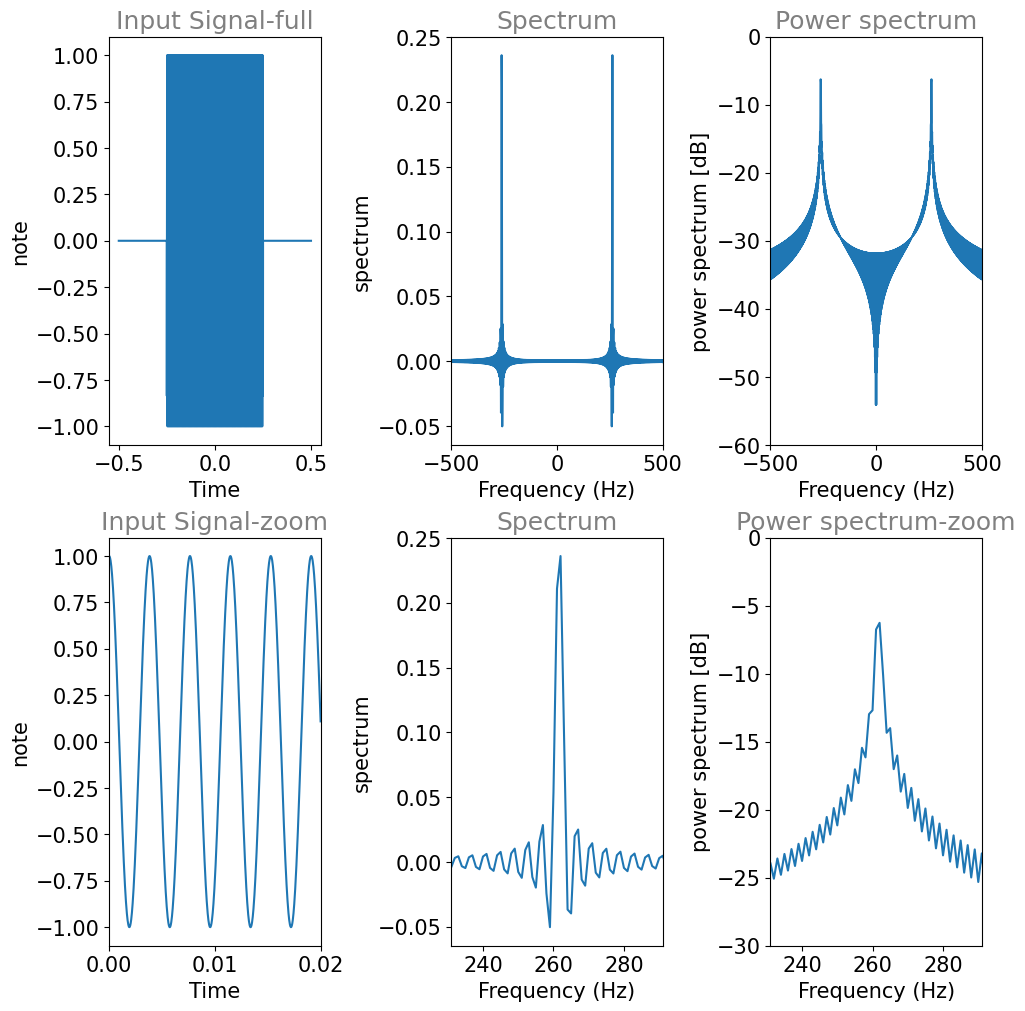

In [8]:

fig1, ax = plt.subplots(2,3, constrained_layout=True)
ax[0, 0].plot(t,Note)
ax[0, 0].set_ylim((-1.1, 1.1))
ax[0, 0].set_title('Input Signal-full', color = 'gray'), ax[0, 0].set_xlabel('Time'), ax[0, 0].set_ylabel('note')


ax[1, 0].plot(t,Note)
ax[1, 0].set_ylim((-1.1, 1.1))
ax[1, 0].set_xlim((0, 0.02))
ax[1, 0].set_title('Input Signal-zoom', color = 'gray'), ax[1, 0].set_xlabel('Time'), ax[1, 0].set_ylabel('note')

ax[0, 1].plot(frequencies,NoteFourier)
ax[0, 1].set_xlim((-500, 500))
ax[0, 1].set_title('Spectrum', color = 'gray'), ax[0, 1].set_xlabel('Frequency (Hz)'), ax[0, 1].set_ylabel('spectrum')

ax[1, 1].plot(frequencies,NoteFourier)
ax[1, 1].set_xlim((231, 291))
ax[1, 1].set_title('Spectrum', color = 'gray'), ax[1, 1].set_xlabel('Frequency (Hz)'), ax[1, 1].set_ylabel('spectrum')


ax[0, 2].plot(frequencies,10*np.log10(np.abs(NoteFourier)))
ax[0, 2].set_xlim((-500,500)), ax[0, 2].set_ylim((-60,0))
ax[0, 2].set_title('Power spectrum', color='gray'), ax[0, 2].set_xlabel('Frequency (Hz)'), ax[0, 2].set_ylabel('power spectrum [dB]')

ax[1, 2].plot(frequencies,10*np.log10(np.abs(NoteFourier)))
ax[1, 2].set_xlim((231, 291)), ax[1, 2].set_ylim((-30,0))
ax[1, 2].set_title('Power spectrum-zoom', color='gray'), ax[1, 2].set_xlabel('Frequency (Hz)'), ax[1, 2].set_ylabel('power spectrum [dB]')

# Signal with added noise

In [9]:
SNR=10 #in dB scale
Note_noise=(np.abs(t)<=(NoteDuration/2))*np.cos(2*np.pi*NoteFreq*t)+np.random.randn(Note.size)*np.sqrt(10**(-SNR/10)) #We made the signal real and even, which dictates that its frequency will be real. If it was odd, it would be imaginary.
max_Note  = np.max(Note_noise)

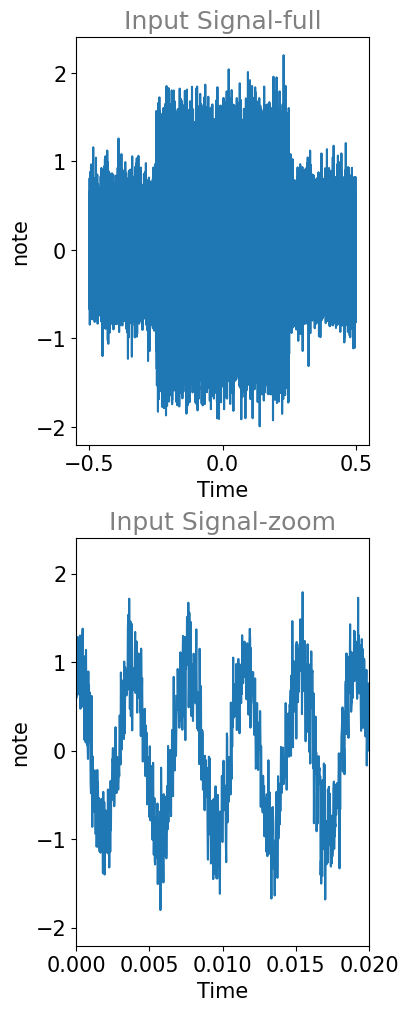

In [10]:

fig2, ax2 = plt.subplots(2,3, constrained_layout=True)

ax2[0, 0].plot(t,Note_noise)
# ax2[0,0].set_ylim((-1.1, 1.1))
ax2[0, 0].set_title('Input Signal-full', color = 'gray'), ax2[0, 0].set_xlabel('Time'), ax2[0, 0].set_ylabel('note')


ax2[1,0].plot(t,Note_noise)
# ax2[1,0].set_ylim((-1.1, 1.1))
ax2[1,0].set_xlim((0, 0.02))
ax2[1, 0].set_title('Input Signal-zoom', color = 'gray'), ax2[1, 0].set_xlabel('Time'), ax2[1, 0].set_ylabel('note')

for i in [1,2]:
    ax2[1, i].set_visible(False)
    ax2[0, i].set_visible(False)

# Play note

In [11]:
NoisyInput = Note_noise
 # normalize to 16-bit range
NoisyInput *= 32767 / np.max(np.abs(NoisyInput))

# convert to 16-bit data
NoisyInput = NoisyInput.astype(np.int16)

In [12]:
# start playback
play_obj = sa.play_buffer(NoisyInput, 1, 2, fs)

# wait for playback to finish before exiting
play_obj.wait_done()

In [13]:
Note_noise = max_Note*Note_noise/np.max(Note_noise)

# Signal at the Frequency-Domain

In [14]:
frequencies_noise = np.fft.fftshift(np.fft.fftfreq(t.shape[-1]))*fs  #Frequency vector, with zero properly placed at N/2+1 position.

NoteFourier_noise = np.fft.fftshift(np.fft.fft(np.fft.fftshift(Note_noise)))/L    

# Since the signal is neither even or odd, the spectrum is now complex. 
#  We use the power spectrum to visualize it

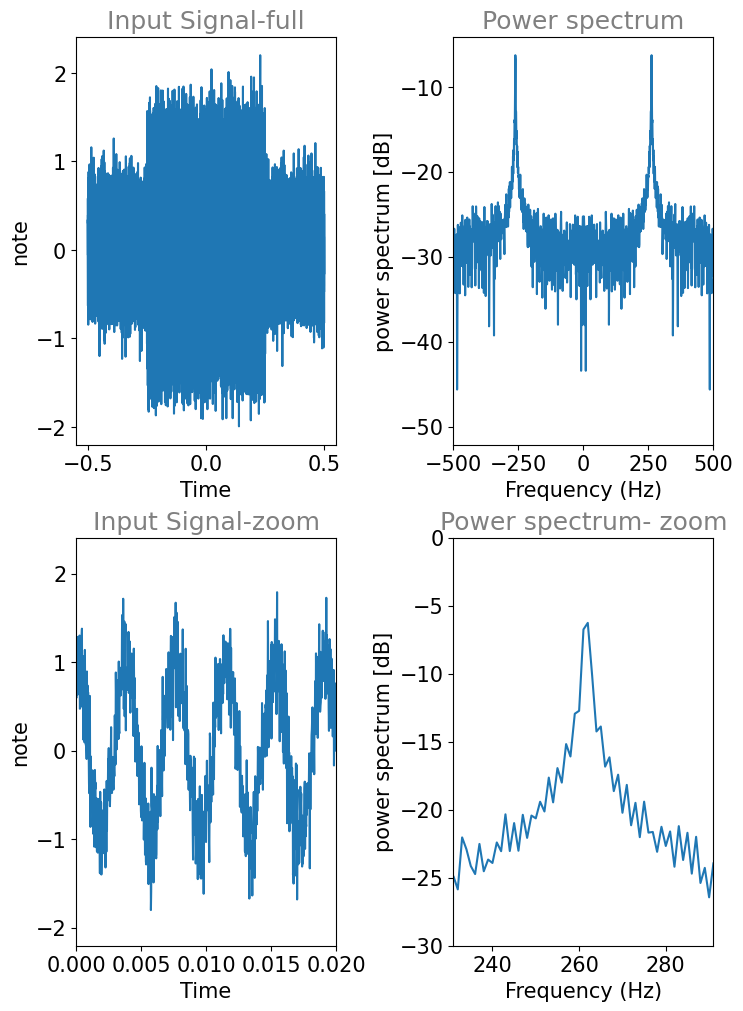

In [16]:
fig2, ax2 = plt.subplots(2,3, constrained_layout=True)

ax2[0, 0].plot(t,Note_noise)
# ax2[0,0].set_ylim((-1.1, 1.1))
ax2[0, 0].set_title('Input Signal-full', color = 'gray'), ax2[0, 0].set_xlabel('Time'), ax2[0, 0].set_ylabel('note')


ax2[1,0].plot(t,Note_noise)
# ax2[1,0].set_ylim((-1.1, 1.1))
ax2[1,0].set_xlim((0, 0.02))
ax2[1, 0].set_title('Input Signal-zoom', color = 'gray'), ax2[1, 0].set_xlabel('Time'), ax2[1, 0].set_ylabel('note')


ax2[0, 1].plot(frequencies_noise,10*np.log10(np.abs(NoteFourier_noise)))
ax2[0, 1].set_xlim((-500,500)), ax[0, 1].set_ylim((-60,0))
ax2[0, 1].set_title('Power spectrum', color='gray'), ax2[0, 1].set_xlabel('Frequency (Hz)'), ax2[0, 1].set_ylabel('power spectrum [dB]')

ax2[1, 1].plot(frequencies_noise,10*np.log10(np.abs(NoteFourier_noise)))
ax2[1, 1].set_xlim((231, 291)), ax2[1, 1].set_ylim((-30,0))
ax2[1, 1].set_title('Power spectrum- zoom', color='gray'), ax2[1, 1].set_xlabel('Frequency (Hz)'), ax2[1, 1].set_ylabel('power spectrum [dB]')


ax2[1, 2].set_visible(False)
ax2[0, 2].set_visible(False)

# bandpass filter

In [17]:
Power = np.min(np.log10(np.abs(NoteFourier_noise)))
Filter = (np.abs(np.abs(frequencies)-NoteFreq)<=10) + 10**Power

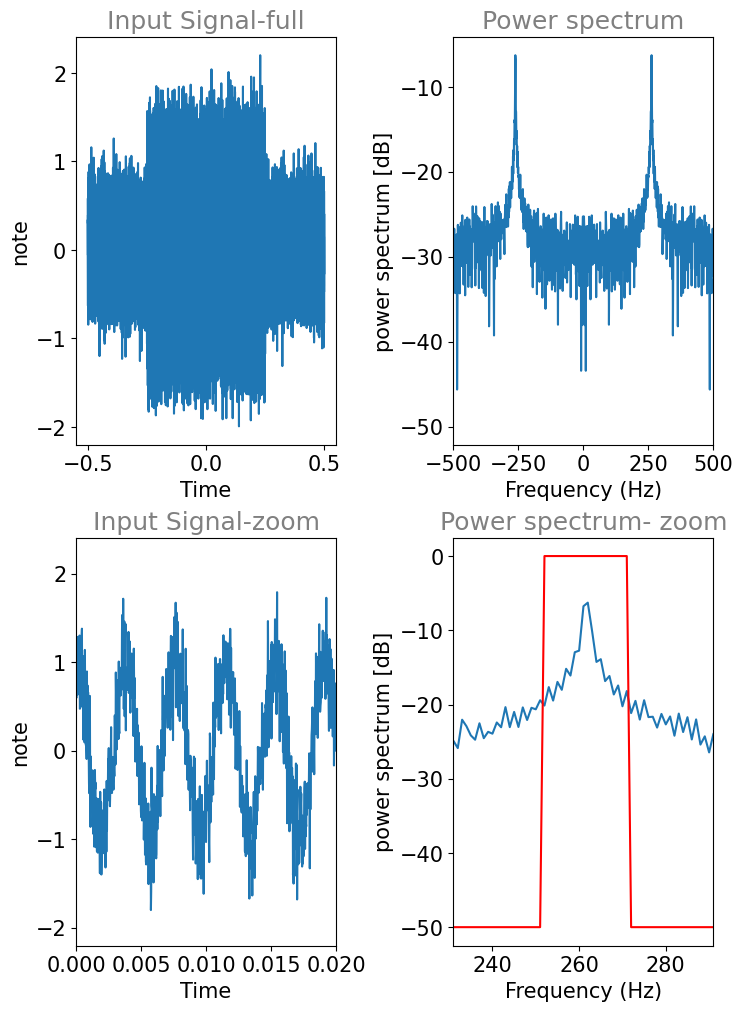

In [18]:
fig2, ax2 = plt.subplots(2,3, constrained_layout=True)

ax2[0, 0].plot(t,Note_noise)
# ax2[0,0].set_ylim((-1.1, 1.1))
ax2[0, 0].set_title('Input Signal-full', color = 'gray'), ax2[0, 0].set_xlabel('Time'), ax2[0, 0].set_ylabel('note')


ax2[1,0].plot(t,Note_noise)
# ax2[1,0].set_ylim((-1.1, 1.1))
ax2[1,0].set_xlim((0, 0.02))
ax2[1, 0].set_title('Input Signal-zoom', color = 'gray'), ax2[1, 0].set_xlabel('Time'), ax2[1, 0].set_ylabel('note')


ax2[0, 1].plot(frequencies_noise,10*np.log10(np.abs(NoteFourier_noise)))
ax2[0, 1].set_xlim((-500,500)), ax[0, 1].set_ylim((-60,0))
ax2[0, 1].set_title('Power spectrum', color='gray'), ax2[0, 1].set_xlabel('Frequency (Hz)'), ax2[0, 1].set_ylabel('power spectrum [dB]')

ax2[1, 1].plot(frequencies_noise,10*np.log10(np.abs(NoteFourier_noise)),frequencies_noise,10*np.log10(Filter),'r')
ax2[1, 1].set_xlim((231, 291)), #ax2[1, 1].set_ylim((-40,0.1))
ax2[1, 1].set_title('Power spectrum- zoom', color='gray'), ax2[1, 1].set_xlabel('Frequency (Hz)'), ax2[1, 1].set_ylabel('power spectrum [dB]')

ax2[1, 2].set_visible(False)
ax2[0, 2].set_visible(False)

# Filter signal in spectrum and return to time

In [19]:
FilteredFourier = NoteFourier_noise*Filter

FilteredNote = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(FilteredFourier)))*L

(Text(0.5, 1.0, 'Input Signal-full- zoom'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'note'))

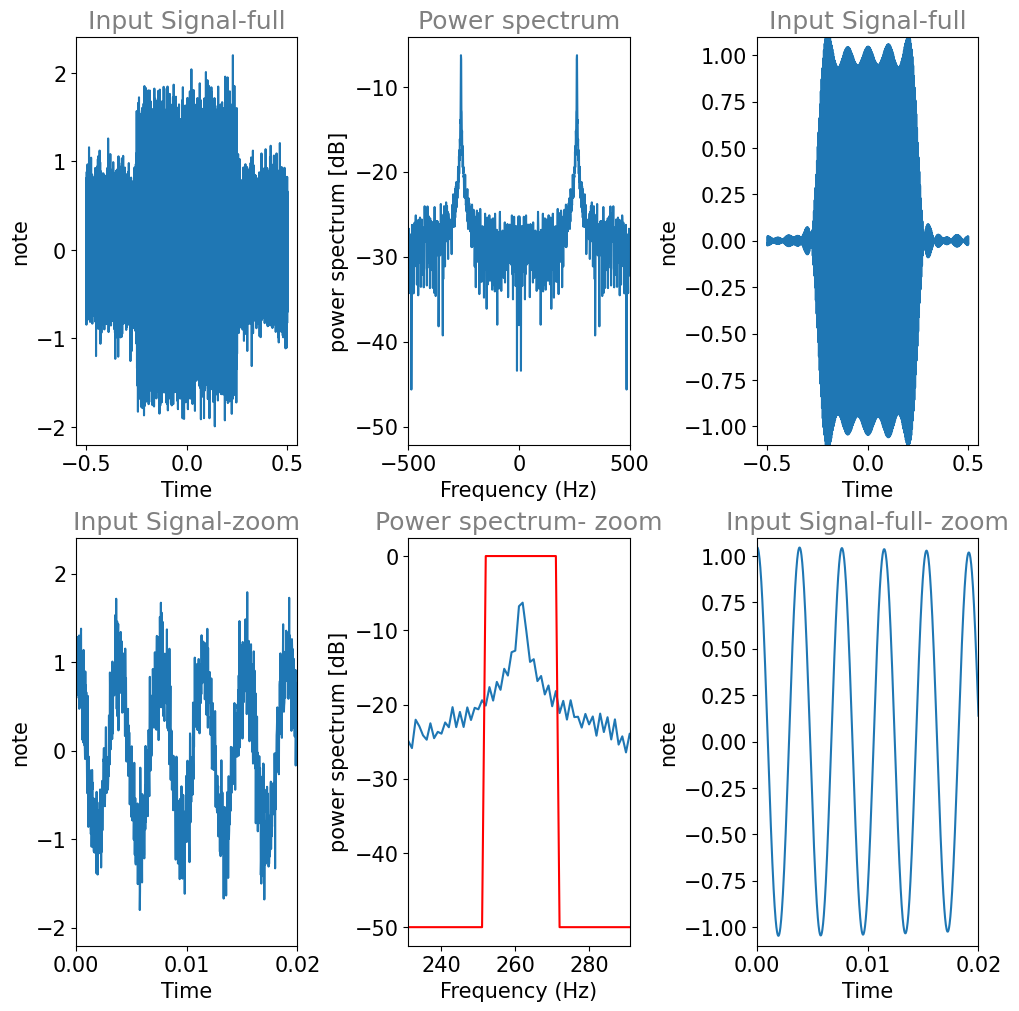

In [20]:
fig2, ax2 = plt.subplots(2,3, constrained_layout=True)

ax2[0, 0].plot(t,Note_noise)
# ax2[0,0].set_ylim((-1.1, 1.1))
ax2[0, 0].set_title('Input Signal-full', color = 'gray'), ax2[0, 0].set_xlabel('Time'), ax2[0, 0].set_ylabel('note')


ax2[1,0].plot(t,Note_noise)
# ax2[1,0].set_ylim((-1.1, 1.1))
ax2[1,0].set_xlim((0, 0.02))
ax2[1, 0].set_title('Input Signal-zoom', color = 'gray'), ax2[1, 0].set_xlabel('Time'), ax2[1, 0].set_ylabel('note')


ax2[0, 1].plot(frequencies_noise,10*np.log10(np.abs(NoteFourier_noise)))
ax2[0, 1].set_xlim((-500,500)), ax[0, 1].set_ylim((-60,0))
ax2[0, 1].set_title('Power spectrum', color='gray'), ax2[0, 1].set_xlabel('Frequency (Hz)'), ax2[0, 1].set_ylabel('power spectrum [dB]')

ax2[1, 1].plot(frequencies_noise,10*np.log10(np.abs(NoteFourier_noise)),frequencies_noise,10*np.log10(Filter),'r')
ax2[1, 1].set_xlim((231, 291)), #ax2[1, 1].set_ylim((-40,0.1))
ax2[1, 1].set_title('Power spectrum- zoom', color='gray'), ax2[1, 1].set_xlabel('Frequency (Hz)'), ax2[1, 1].set_ylabel('power spectrum [dB]')

ax2[0,2].plot(t, FilteredNote)
ax2[0,2].set_ylim(-1.1,1.1)
ax2[0,2].set_title('Input Signal-full',color='gray'), ax2[0,2].set_xlabel('Time'), ax2[0,2].set_ylabel('note')

ax2[1,2].plot(t, FilteredNote)
ax2[1,2].set_ylim(-1.1,1.1), ax2[1,2].set_xlim(0,0.02)
ax2[1,2].set_title('Input Signal-full- zoom',color='gray'), ax2[1,2].set_xlabel('Time'), ax2[1,2].set_ylabel('note')

# Play note

In [22]:
FirlteredInput = FilteredNote
 # normalize to 16-bit range
FirlteredInput *= 32767 / np.max(np.abs(FirlteredInput))

# convert to 16-bit data
FirlteredInput = FirlteredInput.astype(np.int16)

C:\Users\owner\AppData\Local\Temp\ipykernel_21900\3796377079.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  FirlteredInput = FirlteredInput.astype(np.int16)


In [23]:
# start playback
play_obj = sa.play_buffer(FirlteredInput, 1, 2, fs)

# wait for playback to finish before exiting
play_obj.wait_done()